<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Decision Trees

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

*   Develop a classification model using Decision Tree Algorithm


In this lab exercise, you will learn a popular machine learning algorithm, Decision Trees. You will use this classification algorithm to build a model from the historical data of patients, and their response to different medications. Then you will use the trained decision tree to predict the class of a unknown patient, or to find a proper drug for a new patient.


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#downloading_data">Downloading the Data</a></li>
        <li><a href="#pre-processing">Pre-processing</a></li>
        <li><a href="#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#visualization">Visualization</a></li>
    </ol>
</div>
<br>
<hr>


Import the Following Libraries:

<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>


In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

<div id="about_dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of multiclass classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.
</div>


In [2]:
my_data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


<div id="practice"> 
    <h3>Practice</h3> 
    What is the size of data? 
</div>


In [3]:
# write your code here
my_data.size



1200

In [4]:
my_data.shape

(200, 6)

<details><summary>Click here for the solution</summary>

```python
my_data.shape

```

</details>


<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>


Remove the column containing the target name since it doesn't contain numeric values.


In [3]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [12]:
X.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
dtype: object

As you may figure out, some features in this dataset are categorical, such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using **pandas.get_dummies()**
to convert the categorical variable into dummy/indicator variables.


In [1]:
from sklearn.preprocessing import OrdinalEncoder

In [5]:
oe_sex = OrdinalEncoder()
x = oe_sex.fit_transform(X)

In [6]:
x

array([[  8.,   0.,   0.,   0., 167.],
       [ 30.,   1.,   1.,   0.,  89.],
       [ 30.,   1.,   1.,   0.,  43.],
       [ 12.,   0.,   2.,   0.,  10.],
       [ 44.,   0.,   1.,   0., 133.],
       [  7.,   0.,   2.,   0.,  16.],
       [ 32.,   0.,   2.,   0., 120.],
       [ 25.,   1.,   1.,   0.,  59.],
       [ 43.,   1.,   2.,   0., 111.],
       [ 27.,   1.,   1.,   1., 147.],
       [ 30.,   0.,   1.,   0.,  71.],
       [ 18.,   0.,   0.,   1., 145.],
       [ 27.,   1.,   1.,   0., 112.],
       [ 56.,   0.,   1.,   0., 156.],
       [ 33.,   0.,   2.,   0.,  80.],
       [  1.,   0.,   0.,   1., 116.],
       [ 52.,   1.,   1.,   1.,  68.],
       [ 27.,   1.,   0.,   0., 101.],
       [  8.,   1.,   1.,   0.,   5.],
       [ 16.,   0.,   0.,   1., 175.],
       [ 40.,   1.,   1.,   1., 143.],
       [ 46.,   1.,   2.,   0., 173.],
       [ 30.,   1.,   1.,   1., 187.],
       [ 31.,   0.,   1.,   0., 109.],
       [ 17.,   0.,   1.,   0., 191.],
       [ 12.,   0.,   0.,

Now we can fill the target variable.


In [7]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


In [8]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=3)

<h3>Practice</h3>
Print the shape of X_trainset and y_trainset. Ensure that the dimensions match.


In [10]:
# your code
xtrain.shape


(140, 5)

In [11]:
ytrain.shape

(140,)

In [12]:
ytrain

77     drugY
73     drugY
71     drugY
78     drugA
42     drugY
       ...  
0      drugY
184    drugY
131    drugY
152    drugX
106    drugX
Name: Drug, Length: 140, dtype: object

<details><summary>Click here for the solution</summary>

```python
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

```

</details>


Print the shape of X_testset and y_testset. Ensure that the dimensions match.


In [13]:
# your code
xtest.shape


(60, 5)

In [14]:
ytest.shape

(60,)

<details><summary>Click here for the solution</summary>

```python
print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))

```

</details>


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [15]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>


In [16]:
drugTree.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [17]:
predTree = drugTree.predict(xtest)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the predictions to the actual values.


In [18]:
print (predTree [0:5])
print (ytest [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>


In [19]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [20]:
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", accuracy_score(ytest, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


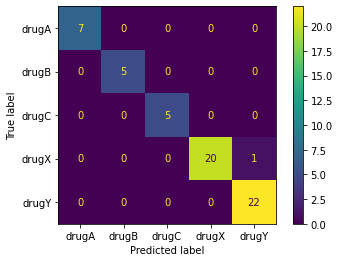

In [21]:
plot_confusion_matrix(drugTree, xtest, ytest)

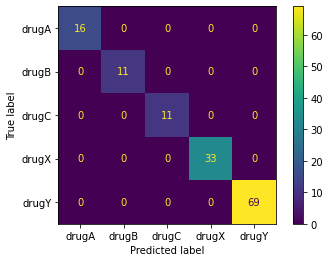

In [26]:
plot_confusion_matrix(drugTree, xtrain, ytrain)

**Accuracy classification score** computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


<hr>

<div id="visualization">
    <h2>Visualization</h2>

Let's visualize the tree

</div>


In [22]:
import graphviz
from sklearn.tree import export_graphviz

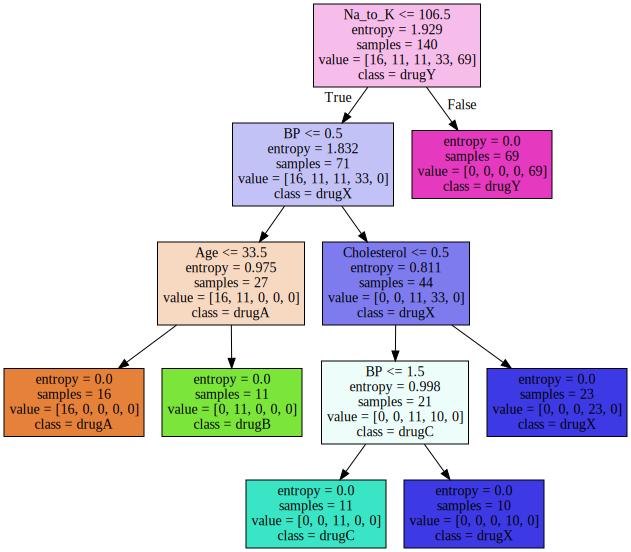

In [25]:
cay_graph=  export_graphviz(drugTree,
                           filled = True,
                           class_names=drugTree.classes_,
                           feature_names=X.columns)
graphviz.Source(cay_graph)

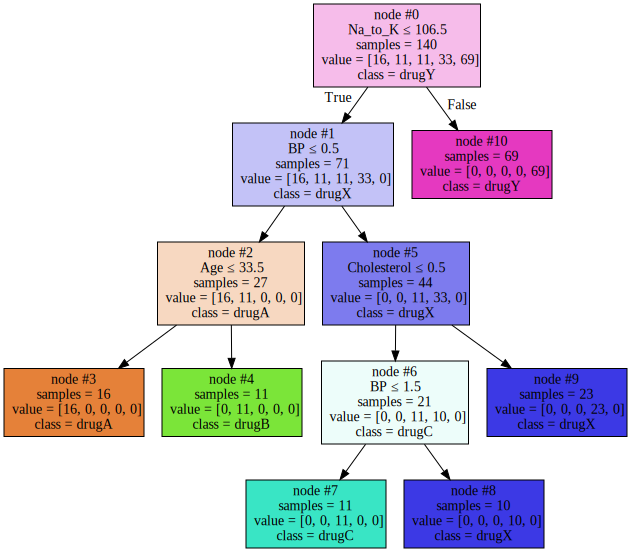

In [27]:
featureNames = my_data.columns[0:5]
cay_graph = export_graphviz(drugTree,
                feature_names = featureNames,
                class_names=drugTree.classes_,
                filled = True,
                node_ids = True,
                special_characters = True,
                impurity = False,
                label = 'all',
                leaves_parallel = False)
graphviz.Source(cay_graph)

In [28]:
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

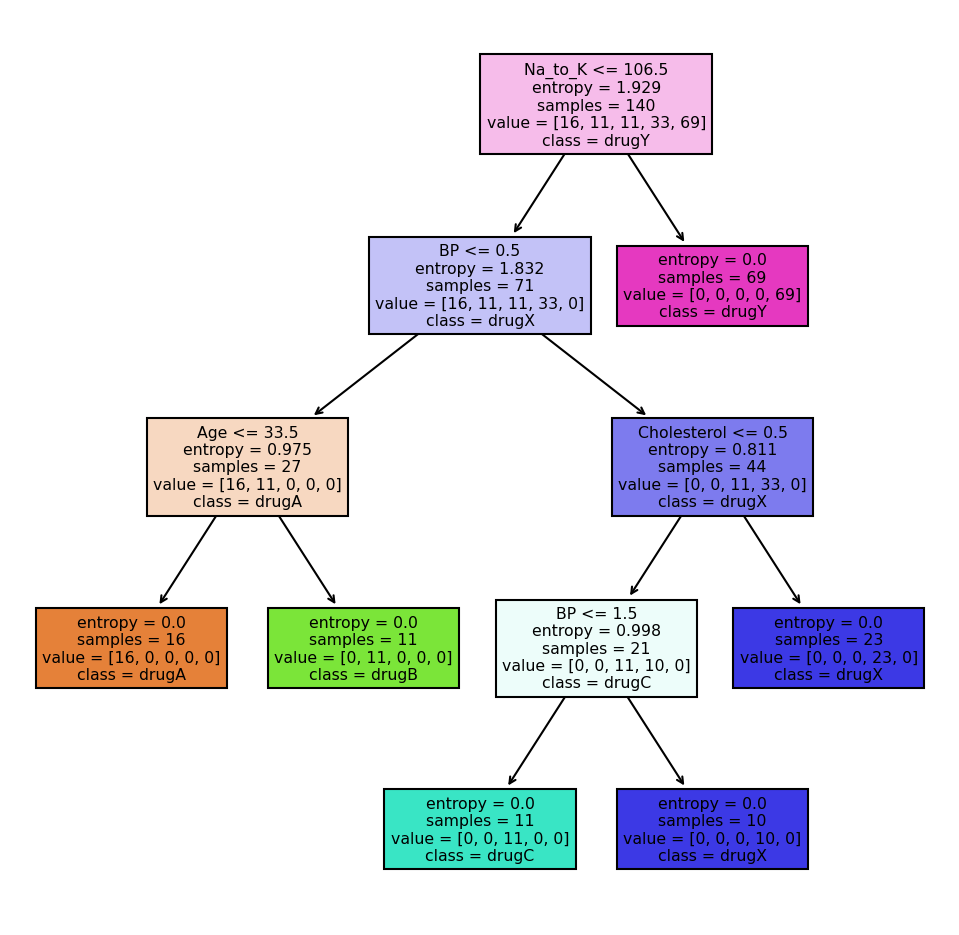

In [31]:
plt.figure(figsize = (8,8), dpi = 150)
plot_tree(drugTree,
         filled = True,
         class_names=drugTree.classes_,
         feature_names=X.columns);

In [32]:
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [33]:
pd.get_dummies(my_data.drop('Drug', axis =1), columns=['Sex'])

,Age,BP,Cholesterol,Na_to_K,Sex_F,Sex_M
0,23,HIGH,HIGH,25.355,1,0
1,47,LOW,HIGH,13.093,0,1
2,47,LOW,HIGH,10.114,0,1
3,28,NORMAL,HIGH,7.798,1,0
4,61,LOW,HIGH,18.043,1,0
...,...,...,...,...,...,...
195,56,LOW,HIGH,11.567,1,0
196,16,LOW,HIGH,12.006,0,1
197,52,NORMAL,HIGH,9.894,0,1
198,23,NORMAL,NORMAL,14.020,0,1


In [34]:
X = pd.get_dummies(my_data.drop('Drug', axis = 1))
y = my_data.Drug

In [35]:
X

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
195,56,11.567,1,0,0,1,0,1,0
196,16,12.006,0,1,0,1,0,1,0
197,52,9.894,0,1,0,0,1,1,0
198,23,14.020,0,1,0,0,1,0,1


In [44]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [50]:
model = DecisionTreeClassifier(max_depth= 4, max_leaf_nodes= 10)

In [51]:
model.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10)

In [52]:
ypred = model.predict(xtest)

In [53]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         2
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



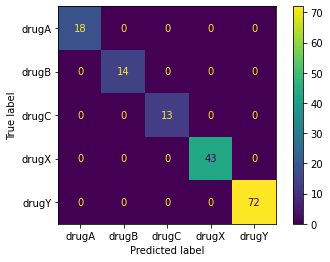

In [54]:
plot_confusion_matrix(model, xtrain, ytrain)

In [55]:
model.classes_

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype=object)

In [56]:
my_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

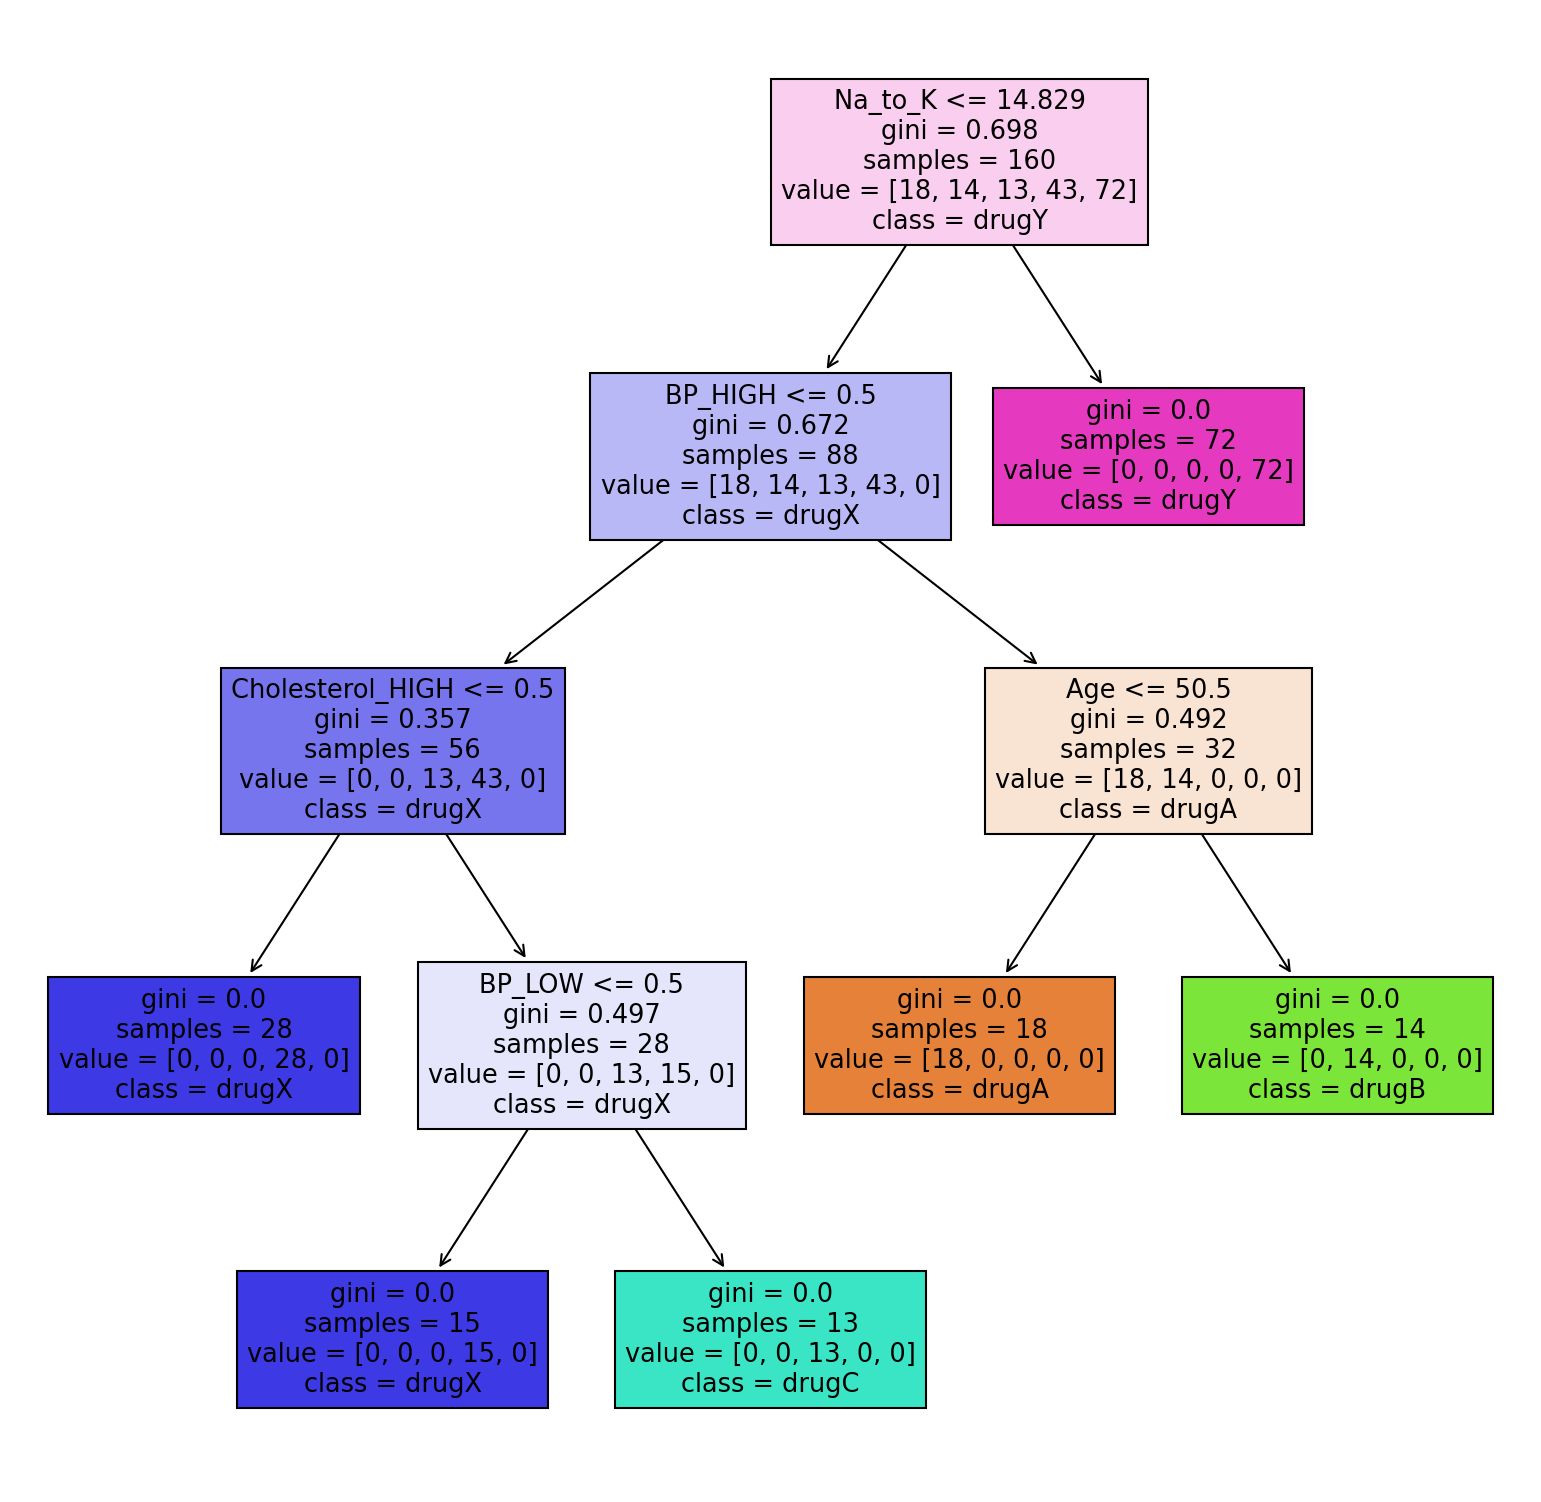

In [58]:
plt.figure(figsize = (13,13),dpi = 150)
plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_);

In [60]:
model.classes_

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype=object)

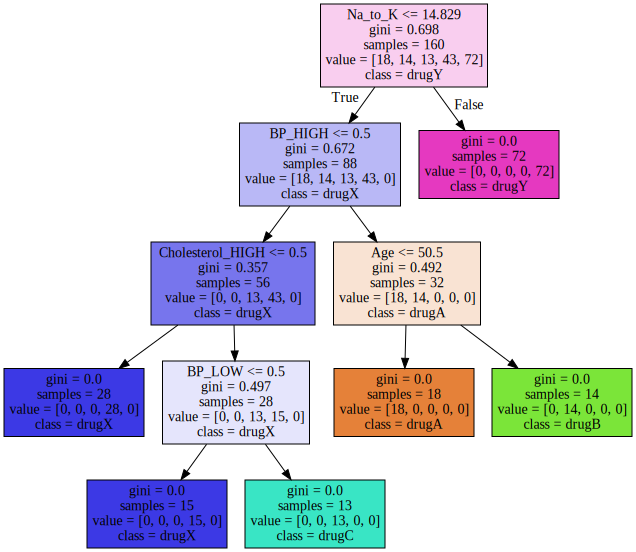

In [60]:
cay_graph = export_graphviz(model,
                           feature_names=X.columns,
                           class_names=model.classes_,
                           filled = True)
graphviz.Source(cay_graph)

In [73]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = my_data.Drug
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=3)

In [74]:
from sklearn.preprocessing import OneHotEncoder

In [82]:
ohe = OneHotEncoder(sparse=False)
x = ohe.fit_transform(X)

ValueError: Shape mismatch: if categories is an array, it has to be of shape (n_features,).

In [75]:
xtrain

,Age,Sex,BP,Cholesterol,Na_to_K
77,26,F,HIGH,NORMAL,19.161
73,41,F,NORMAL,NORMAL,22.905
71,28,F,NORMAL,HIGH,19.675
78,19,F,HIGH,HIGH,13.313
42,50,M,NORMAL,NORMAL,15.790
...,...,...,...,...,...
0,23,F,HIGH,HIGH,25.355
184,18,F,HIGH,HIGH,37.188
131,52,M,LOW,NORMAL,32.922
152,55,M,NORMAL,NORMAL,7.261


In [76]:
ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")

In [77]:
xtrain_processed = ohe.fit_transform(xtrain[['Sex', 'BP', 'Cholesterol']])

In [78]:
xtrain_processed

array([[1., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 1., 0.],
       [1., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 1., 0.],
       [1., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 1., 0.],
 

In [79]:
pd.DataFrame(xtrain_processed, columns=[f"ohe_{i}" for i in range(xtrain_processed.shape[1])])

,ohe_0,ohe_1,ohe_2,ohe_3,ohe_4,ohe_5,ohe_6
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
135,1.0,0.0,1.0,0.0,0.0,1.0,0.0
136,1.0,0.0,1.0,0.0,0.0,1.0,0.0
137,0.0,1.0,0.0,1.0,0.0,0.0,1.0
138,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [81]:
pd.concat([xtrain, xtrain_processed], axis=1)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [68]:
def data_preprocessing(xtrain, xvalid, object_cols, useful_features, obj_method,cat_method, xtest=None):
    """
    method = ['ohe', "ordinal", "standardize", "log", "poly",'target_enc']
    Note: inhere target_enc is implemented in the data_preprocessing_increase_feat funciton 
    for some contrainst of the coding. How ever this is a method to transform caetegorical to number 
    """
    # categorical
    if obj_method == 'ohe':
        # print ("ohe processing for categorical feature")
        ohe = preprocessing.OneHotEncoder(sparse=False, handle_unknown="ignore")
        xtrain_processed = ohe.fit_transform(xtrain[object_cols])
        xvalid_processed = ohe.transform(xvalid[object_cols])
 
        xtrain_processed = pd.DataFrame(xtrain_processed, columns=[f"ohe_{i}" for i in range(xtrain_processed.shape[1])])
        xvalid_processed = pd.DataFrame(xvalid_processed, columns=[f"ohe_{i}" for i in range(xvalid_processed.shape[1])])
 
        xtrain = pd.concat([xtrain, xtrain_processed], axis=1)
        xvalid = pd.concat([xvalid, xvalid_processed], axis=1)
 
        xtrain = xtrain.drop(object_cols, axis=1)
        xvalid = xvalid.drop(object_cols, axis=1)
 
        if xtest:
            xtest_processed = ohe.transform(xtest[object_cols])
            xtest_processed = pd.DataFrame(xtest_processed, columns=[f"ohe_{i}" for i in range(xtest_processed.shape[1])])
            xtest = pd.concat([xtest, xtest_processed], axis=1)
            xtest = xtest.drop(object_cols, axis=1)
 
    elif obj_method == "ordinal":
        # print ("ordinal processing for categorical feature ")
        ordinal_encoder = preprocessing.OrdinalEncoder()
        xtrain[object_cols] = ordinal_encoder.fit_transform(xtrain[object_cols])
        xvalid[object_cols] = ordinal_encoder.transform(xvalid[object_cols])
        if xtest:
            xtest[object_cols] = ordinal_encoder.transform(xtest[object_cols])
    else:
        pass
 
     
    # numerical
    numerical_cols = [col for col in useful_features if col.startswith("cont")]
    if cat_method == "standardize":
        # print ("standardize processing for numerical feature")
        scaler = preprocessing.StandardScaler()
        xtrain[numerical_cols] = scaler.fit_transform(xtrain[numerical_cols])
        xvalid[numerical_cols] = scaler.transform(xvalid[numerical_cols])
        if xtest:
            xtest[numerical_cols] = scaler.transform(xtest[numerical_cols])
     
    elif cat_method == "log":
        # print ("log processing for numerical feature")
        for col in numerical_cols:
            xtrain[col] = np.log1p(xtrain[col])
            xvalid[col] = np.log1p(xvalid[col])
            if xtest:
                xtest[col] = np.log1p(xtest[col])
    else:
        pass
 
    return xtrain, xvalid, xtest

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>


### Thank you for completing this lab!

## Author

Saeed Aghabozorgi

### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01" target="_blank">Joseph Santarcangelo</a>

## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-11-20  | 2.2  | Lakshmi  | Changed import statement of StringIO|
| 2020-11-03  | 2.1  | Lakshmi  | Changed URL of the csv            |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |
|   |   |   |   |
|   |   |   |   |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
